# k-Nearest Neighbors Algorithm

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIForVet/aiml/blob/main/07-k-nearest_neighbors.ipynb)

This notebook follows the lesson on the k-Nearest Neighbors algorithm.

Execute the cell below and load the libraries that we will need for further work.

In [9]:
import numpy as np
from matplotlib import pyplot as plt

First, we will process the data. The variable `instance` represents all instances in the dataset. The first row lists the blue instances, and the second row lists the red ones. The green instance that needs to be classified is also specified separately.

In [10]:
instances = [
        (-0.25, 0, 1), (-2.5, 2, 1), (-1.5, 1.5, 1), (-2.5, 0.5, 1), (-2.5, 2, 1), (-2.5, 4, 1), (0.5, 3, 1), # plave
        (-1.5, 3.5, 0), (1, 3.5, 0), (3, 3, 0), (0.5, 0.25, 0), (0.75, -0.5, 0) #crvene
  ]

green_instance = (0, 0)

The following function will help us display the neighborhood of the green instance determined by the choice of the number `k`.

In [11]:
def show_neighborhood(k, instances=instances, green_instance=green_instance):

  # set up the plot panel
  fig, ax = plt.subplots()
  ax.set_aspect(1)
  ax.set_axis_off()
  fig.set_size_inches(5, 5)

  # display instances
  for instance in instances:
    # determine color and shape for each instance
    color = 'red' if instance[2] == 0 else 'blue'
    shape = '^' if instance[2] == 0 else 's'
    ax.scatter(instance[0], instance[1], color=color, marker=shape)

  # display the green instance
  ax.scatter(green_instance[0], green_instance[1], color='green')

  # calculate the distance from the green instance to all instances in the set
  distances = np.array([np.sqrt(instance[0]**2 + instance[1]**2) for instance in instances])

  # determine the k-th distance
  k_distance = np.sort(distances)[k-1]

  # draw a circle around the green instance with a radius corresponding to the observed distance
  r = k_distance + 0.05
  circle = plt.Circle((green_instance[0], green_instance[1]), r, color='gray', linestyle='--', fill=False)
  ax.add_patch(circle)

  # finally, display the neighborhood
  plt.show()

Now you can choose the value of k by moving the slider, then plot the neighborhood and decide which class the green instance belongs to. To plot the neighborhood, you need to execute the cell.

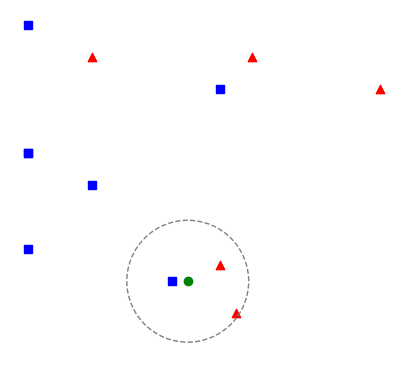

In [12]:
k = 3 # @param {type:"slider", min:1, max:12, step:1}
show_neighborhood(k)

The following cell contains a function that classifies a new instance based on the given instances using the k-nearest neighbors algorithm. After considering which class the instance belongs to, you can check your conclusion by executing this function.

In [13]:
def euclidean_distance(instance1, instance2):
  return np.sqrt((instance1[0]-instance2[0])**2 + (instance1[1]-instance2[1])**2)

In [14]:
def kNN(k, instances, new_instance, classes={0: 'red', 1: 'blue'}):

  # first, calculate the distances between the new instance and all instances in the dataset
  distances = [euclidean_distance(instance, new_instance) for instance in instances]

  # then sort the distances, extract the k smallest ones and the corresponding instances
  # declare them as neighbors
  neighbors = np.argsort(distances)[0:k]

  # then read the labels of the neighbors and count them
  neighbor_labels = [instances[neighbor][2] for neighbor in neighbors]
  label_counts = np.bincount(neighbor_labels)

  # the label of the new instance will be the label of the most frequent neighbor
  label = np.argmax(label_counts)

  return classes[label]

In [15]:
kNN(3, instances, green_instance)

'red'